In [1]:
import pandas as pd
import numpy as np
import altair as alt
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import glob

## Submission Sentiment by Age and Gender

In [3]:
submission_age_gender_sentiment = pd.read_csv("../../data/nlp-data/submission_age_gender_sentiment_new.csv")
submission_age_gender_sentiment.loc[~submission_age_gender_sentiment['regex_gender'].isin(['m', 'f']), 'regex_gender'] = 'Other'

submission_age_gender_sentiment['regex_gender'] = submission_age_gender_sentiment['regex_gender'].replace({'m': 'Male',
                                                                                                           'f': 'Female'})
submission_age_gender_sentiment['sentiment'] = submission_age_gender_sentiment['sentiment'].replace({'positive': 'Positive',
                                                                                                     'neutral': 'Neutral',
                                                                                                     'negative': 'Negative'})
submission_age_gender_sentiment = submission_age_gender_sentiment.rename(columns = {'sentiment': 'Sentiment'})

### Sentiment by Age

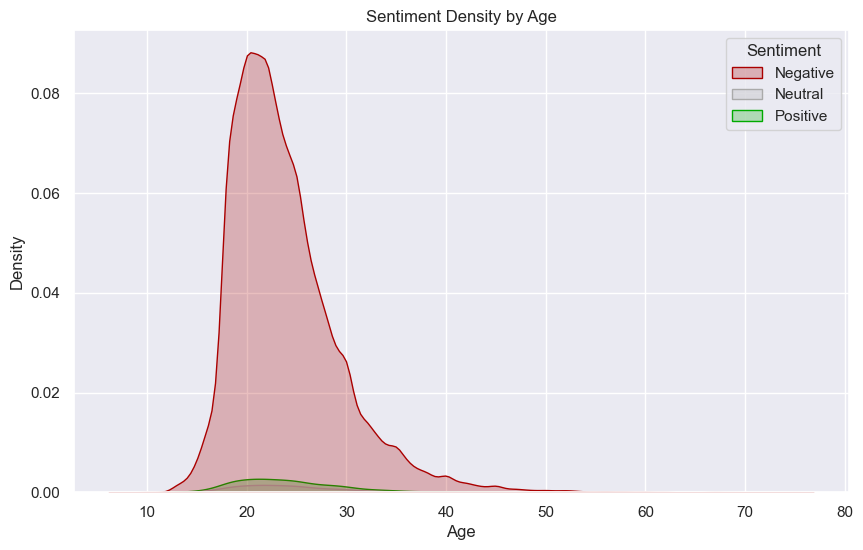

In [8]:
sns.set_theme()

palette = dict(Negative = '#aa0000', Neutral = '#aaaaaa', Positive = '#00aa00')

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.kdeplot(submission_age_gender_sentiment, x = 'regex_age', hue = 'Sentiment', fill = True, palette = palette, ax = ax)
ax.set_xlabel('Age'); ax.set_ylabel('Density'); ax.set_title('Sentiment Density by Age')
plt.savefig('../../website-source/img/nlp-plots/predicting-subreddits-density-age.png')
plt.show()

### Sentiment by Gender

In [10]:
df = pd.DataFrame(submission_age_gender_sentiment[['Sentiment', 'regex_gender']].value_counts()).reset_index()
df.columns = ['Sentiment', 'regex_gender', 'count']
df

,Sentiment,regex_gender,count
0,Negative,Female,33831
1,Negative,Male,21453
2,Positive,Female,1243
3,Negative,Other,785
4,Positive,Male,769
5,Neutral,Female,664
6,Neutral,Male,435
7,Positive,Other,43
8,Neutral,Other,19


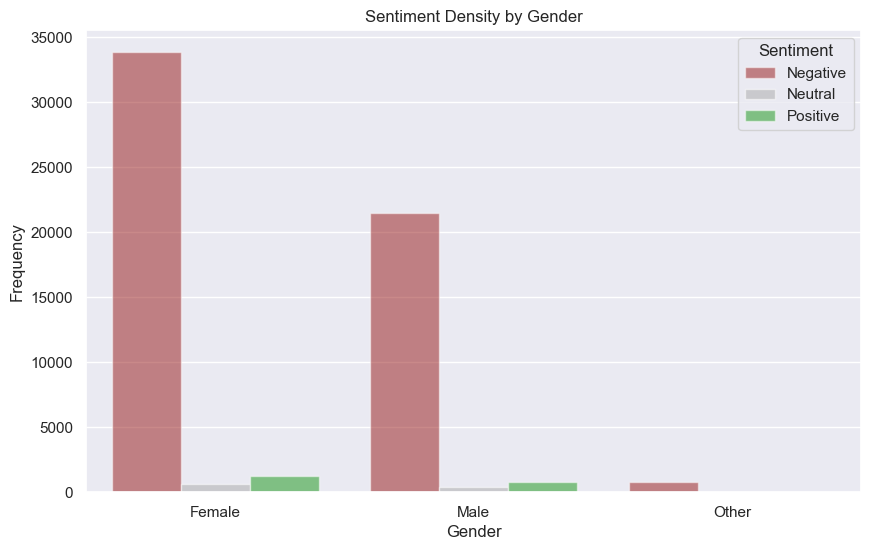

In [11]:
sns.set_theme()

palette = dict(Negative = '#aa0000', Neutral = '#aaaaaa', Positive = '#00aa00')

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.barplot(
    data = df, x = 'regex_gender', y = 'count', hue = 'Sentiment', hue_order = ['Negative', 'Neutral', 'Positive'],
    palette = palette, alpha = 0.5, ax = ax)
ax.set_xlabel('Gender'); ax.set_ylabel('Frequency'); ax.set_title('Sentiment Density by Gender')
plt.savefig('../../website-source/img/nlp-plots/predicting-subreddits-density-gender.png')
plt.show()

In [15]:
df = pd.DataFrame(submission_age_gender_sentiment[['sentiment', 'regex_gender']].value_counts()).reset_index()
df.columns = ['sentiment', 'regex_gender', 'count']
df

,sentiment,regex_gender,count
0,negative,f,33831
1,negative,m,21453
2,positive,f,1243
3,negative,other,785
4,positive,m,769
5,neutral,f,664
6,neutral,m,435
7,positive,other,43
8,neutral,other,19


In [16]:
sentiments = ['negative', 'neutral', 'positive']
genders = ['f', 'm', 'other']

t = np.zeros(shape = (3, 3))
for si, s in enumerate(sentiments):
    for gi, g in enumerate(genders):
        t[si, gi] = df.loc[(df['sentiment'] == s) & (df['regex_gender'] == g), 'count']

In [21]:
df_table = pd.DataFrame(t, columns = genders, index = sentiments)
df_table = df_table / df_table.sum(axis = 0)
df_table.to_csv('../../data/nlp-data/predicting-subreddits-gender-table.csv', index = False)

In [22]:
df_table

,f,m,other
negative,0.946639,0.946860,0.926800
neutral,0.018580,0.019199,0.022432
positive,0.034781,0.033941,0.050767
